In [1]:
import tensorflow as tf
from tensorflow.keras import optimizers
from experiment1.model_em1 import FCZipSeismicDataV4
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [5]:
import json

In [6]:
model = FCZipSeismicDataV4()

In [7]:
model.load_weights(r'E:\stuCode\diqiuwuli\experiment1\weights2\weights_0_32_20000')

In [8]:
test_x = np.load(r'E:\stuCode\diqiuwuli\experiment1\loss\inputs.npy')

In [7]:
test_x.shape

(32, 33, 10240)

In [9]:
data_json_f = open(r'E:\stuCode\diqiuwuli\experiment1\loss2\run-loss_fc_encoder_decoder11-tag-train_loss.json','r')

In [11]:
data_json_f.close()

In [13]:
# data_json_str = data_json_f.read()

In [10]:
data_json = json.load(data_json_f)

In [12]:
loss_data = np.array(data_json)

In [13]:
index = loss_data[:,1]
loss = loss_data[:,2]

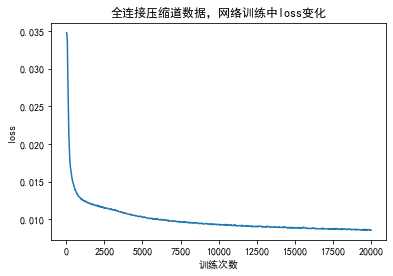

In [14]:
plt.title("全连接压缩道数据，网络训练中loss变化")
plt.ylabel("loss")
plt.xlabel("训练次数")
plt.plot(index,loss)
plt.savefig(r'E:\tools\写论文\图表数据\全连接提取特征\全连接网络训练中loss变化2.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

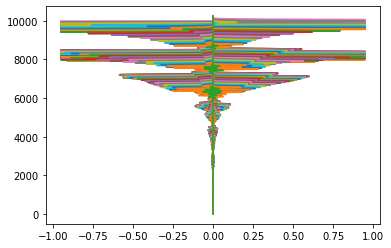

In [8]:
index = [i for i in range(10240)]
for i in range(33):
    plt.plot(test_x[i][::-1],index)

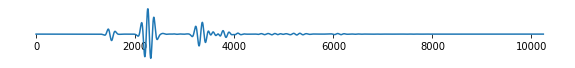

In [23]:
plt.figure(figsize=(10,1))
plt.plot(index,test_x[1])
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
# plt.xticks([])
plt.yticks([])
# ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.savefig(r'E:\tools\写论文\图表数据\全连接提取特征\单道数据展示.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

In [43]:
test_x.shape

(32, 33, 10240)

In [15]:
y_pred = model(test_x)

In [16]:
y_pred,_,x_hidden = y_pred

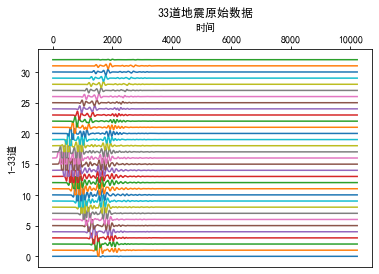

In [17]:
plt.title("33道地震原始数据")
plt.ylabel("1-33道")
plt.xlabel("时间")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
for dao_num in range(33):
#     plt.rcParams['figure.figsize'] = (1.0, 1.0)
    plt.plot([i for i in range(10240)],test_x[0][dao_num]+dao_num)

In [32]:
np.random.randint(0,32)

8

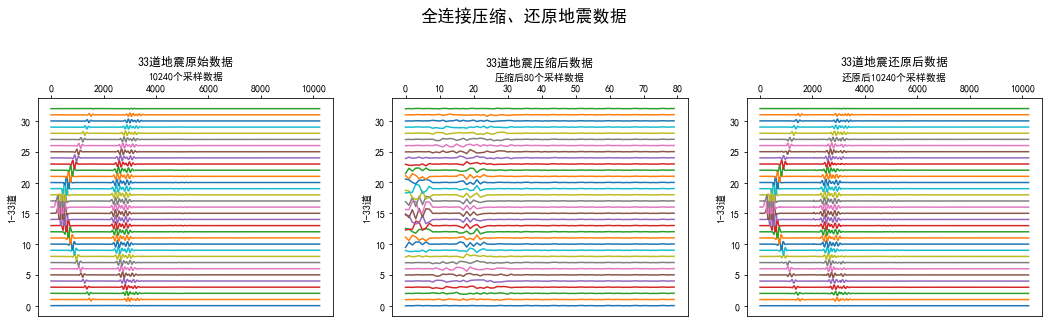

In [34]:
index = np.random.randint(0,32)
plt.figure(figsize=(18,4))
plt.suptitle('全连接压缩、还原地震数据',y=1.2,fontsize='xx-large')
plt.subplot(1, 3, 1)
plt.title("33道地震原始数据")
plt.ylabel("1-33道")
plt.xlabel("10240个采样数据")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
for dao_num in range(33):
#     plt.rcParams['figure.figsize'] = (1.0, 1.0)
    plt.plot([i for i in range(10240)],test_x[index][dao_num]+dao_num)

plt.subplot(1, 3, 2)
plt.title("33道地震压缩后数据")
plt.ylabel("1-33道")
plt.xlabel("压缩后80个采样数据")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
for dao_num in range(33):
#     plt.rcParams['figure.figsize'] = (1.0, 1.0)
    plt.plot([i for i in range(80)],x_hidden[index][dao_num]+dao_num)
    
plt.subplot(1, 3, 3)
plt.title("33道地震还原后数据")
plt.ylabel("1-33道")
plt.xlabel("还原后10240个采样数据")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
for dao_num in range(33):
#     plt.rcParams['figure.figsize'] = (1.0, 1.0)
    plt.plot([i for i in range(10240)],y_pred[index][dao_num]+dao_num)
plt.savefig(r'E:\tools\写论文\图表数据\全连接提取特征\全连接压缩、还原地震数据.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)